### Calibration / sanity check for the simualtion

### CW-NMR simulation with monochromatic excitation


In [1]:
import os
import sys

print(os.path.abspath(os.curdir))
os.chdir("..")  # go to parent folder
os.chdir("..")  # go to parent folder
print(os.path.abspath(os.curdir))
sys.path.insert(0, os.path.abspath(os.curdir))

c:\Users\zhenf\D\Yu0702\NMR-simulator\Tests\20250326-Simulations-for-calibration
c:\Users\zhenf\D\Yu0702\NMR-simulator


In [2]:
import numpy as np
import time
from SimuTools import Sample, MagField, Simulation, TTL
from DataAnalysis import LIASignal
from functioncache import check

In [3]:
ExampleSample10MHzT = Sample(
    name="TestSample",  # name of the atom/molecule
    gyroratio=2
    * np.pi
    * (10)
    * 10**6,  # [Hz/T]. Remember input it like 2 * np.pi * 11.777*10**6
    numofnuclei=1,  #
    tempunit="K",  # temperature scale
    T2=1 / np.pi,  # [s]
    T1=1000,  # [s]
    pol=1,
    verbose=False,
)

excField = MagField(name="excitation field")  # excitation field in the rotating frame

excField.nu = 1e6 + 5  # [Hz]

In [4]:
simu = Simulation(
    name="TestSample 10MHzT",
    sample=ExampleSample10MHzT,  # class Sample
    # gyroratio=(2*np.pi)*11.777*10**6,  # [Hz/T]
    init_time=0.0,  # [s]
    station=None,
    init_mag_amp=1.0,
    init_M_theta=0.0,  # [rad]
    init_M_phi=0.0,  # [rad]
    demodfreq=1e6,
    B0z=(1e6 - 0) / (ExampleSample10MHzT.gyroratio / (2 * np.pi)),  # [T]
    simuRate=(6696.42871094),  #
    duration=10,
    excField=excField,
    verbose=False,
)

In [5]:
simu.generatePulseExcitation(
    pulseDur=1.0 * simu.duration,
    tipAngle=np.pi / 1000,
    direction=np.array([1, 0, 0]),
    showplt=False,  # whether to plot B_ALP
    plotrate=None,
    verbose=False,
)

In [6]:
tic = time.perf_counter()
simu.GenerateTrajectory(verbose=False)
toc = time.perf_counter()
print(f"GenerateTrajectory time consumption = {toc-tic:.3f} s")

GenerateTrajectory time consumption = 0.034 s


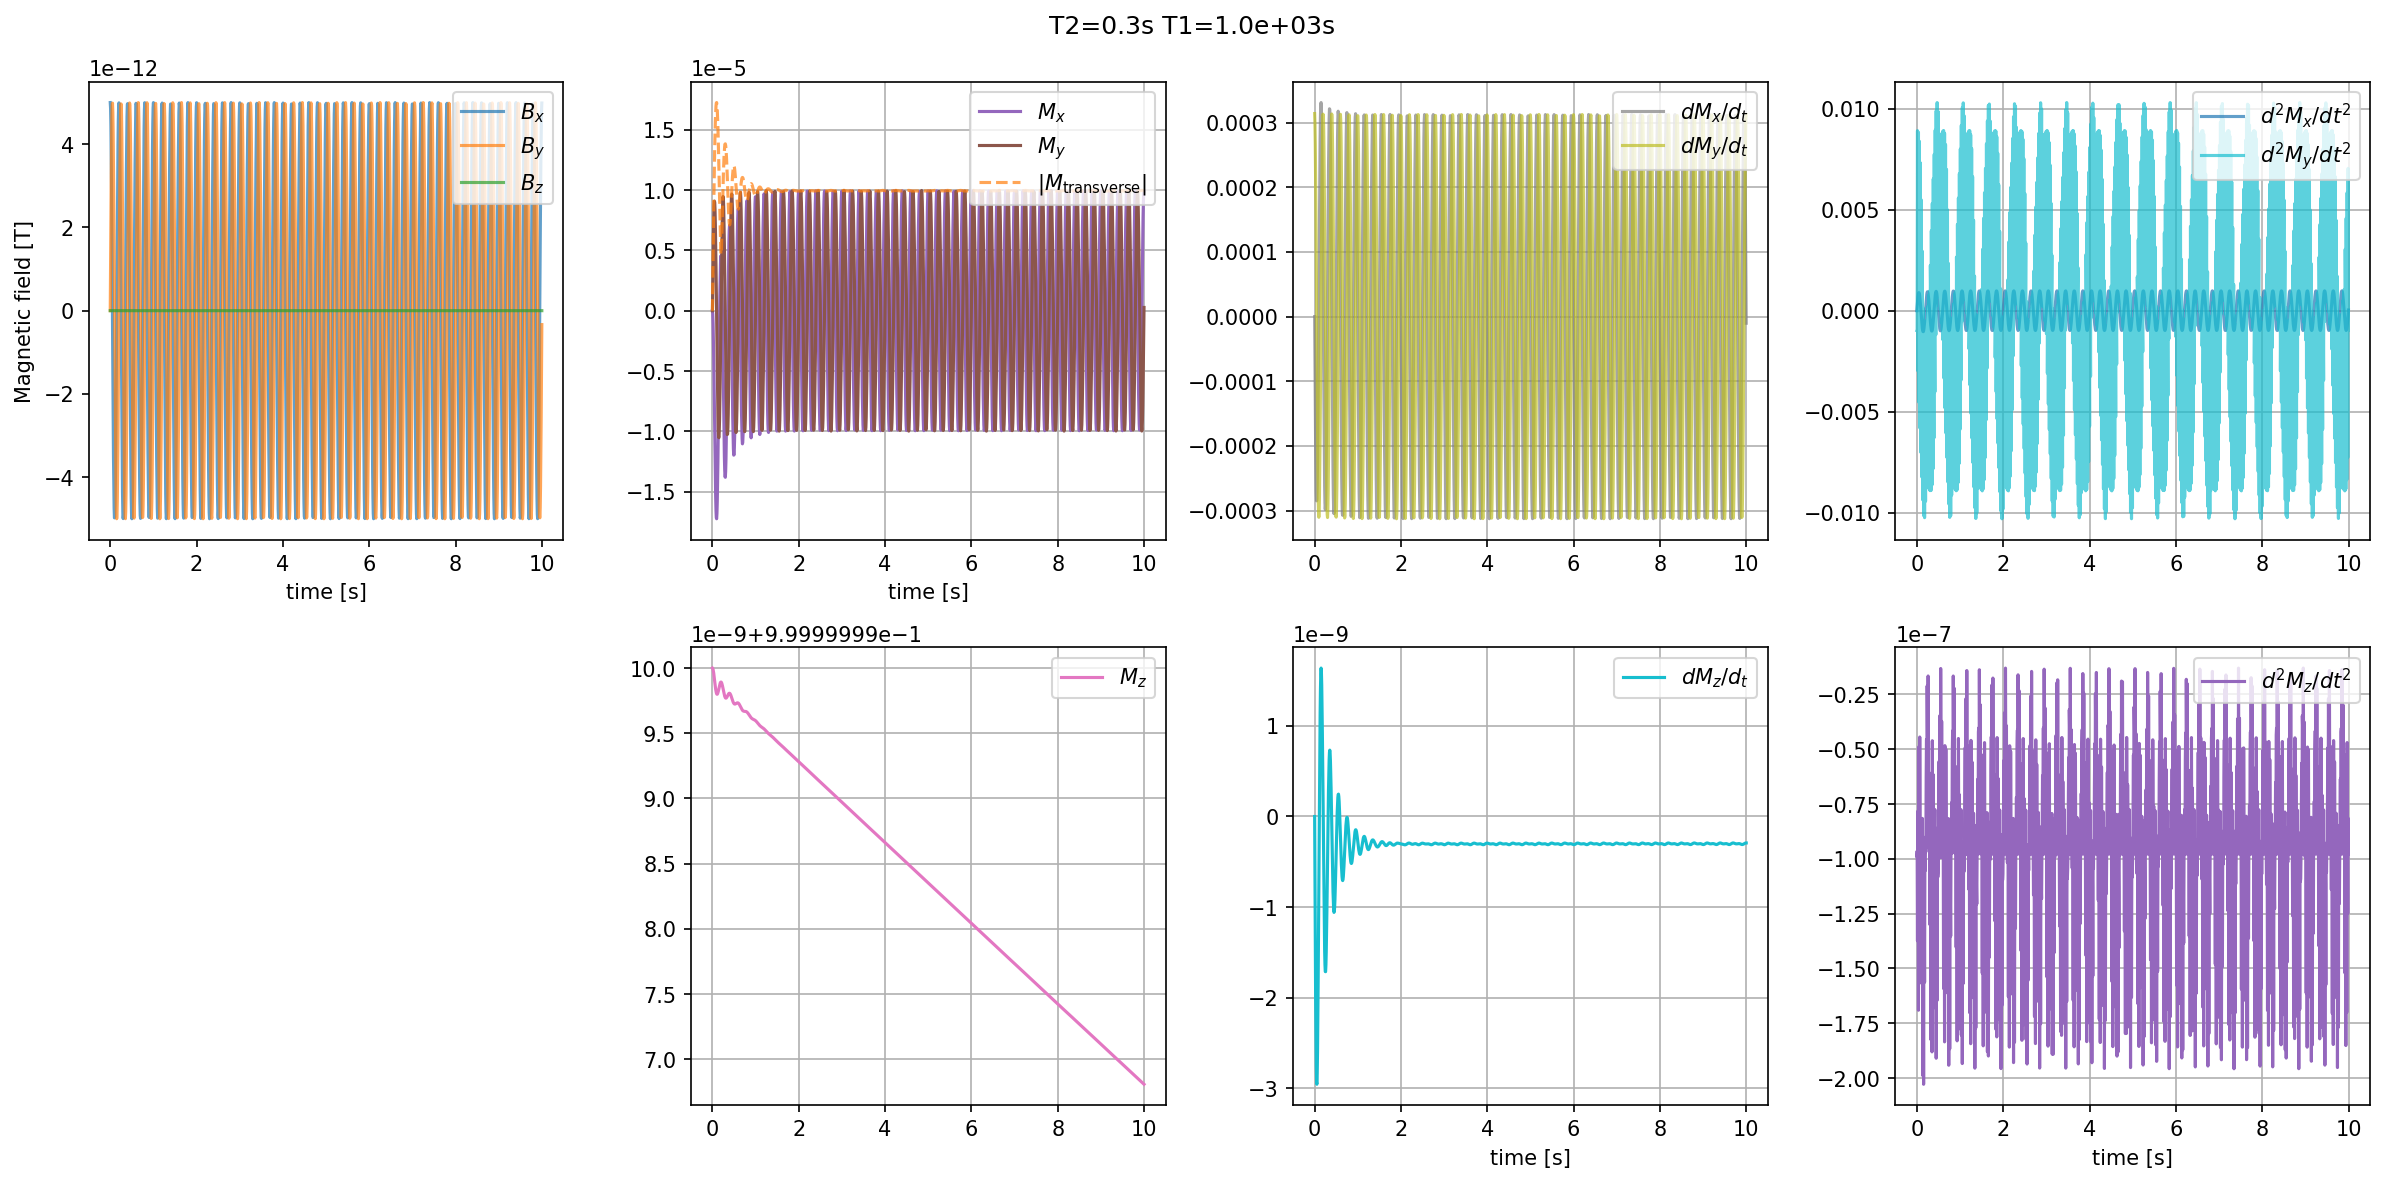

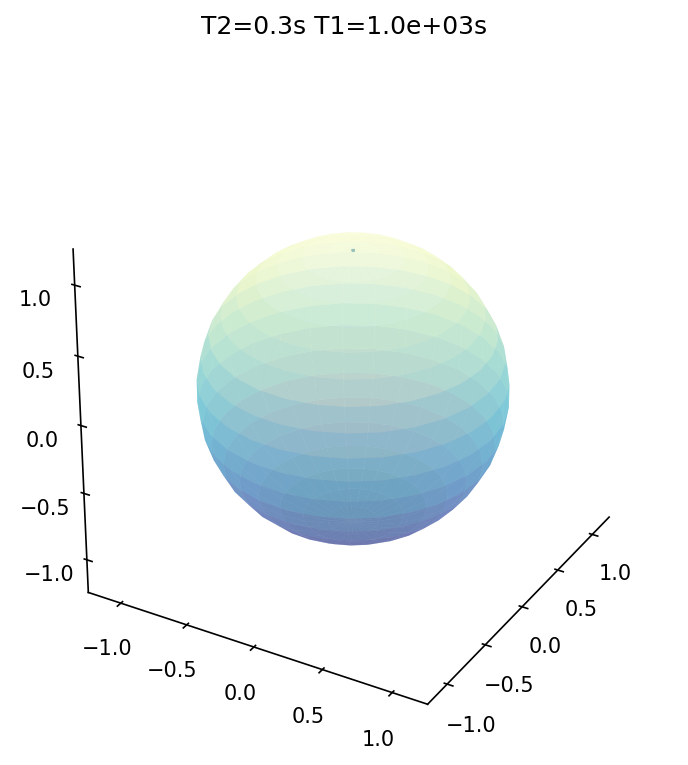

In [7]:
simu.MonitorTrajectory(plotrate=133, verbose=True)
simu.VisualizeTrajectory3D(
    plotrate=1e3,  # [Hz]
    # rotframe=True,
    verbose=False,
)

In [8]:
simu.analyzeTrajectory()

c:\Users\zhenf\D\Yu0702\NMR-simulator\DataAnalysis.py line 4121 chunk_list : range(range(0, 1)) [len=1]


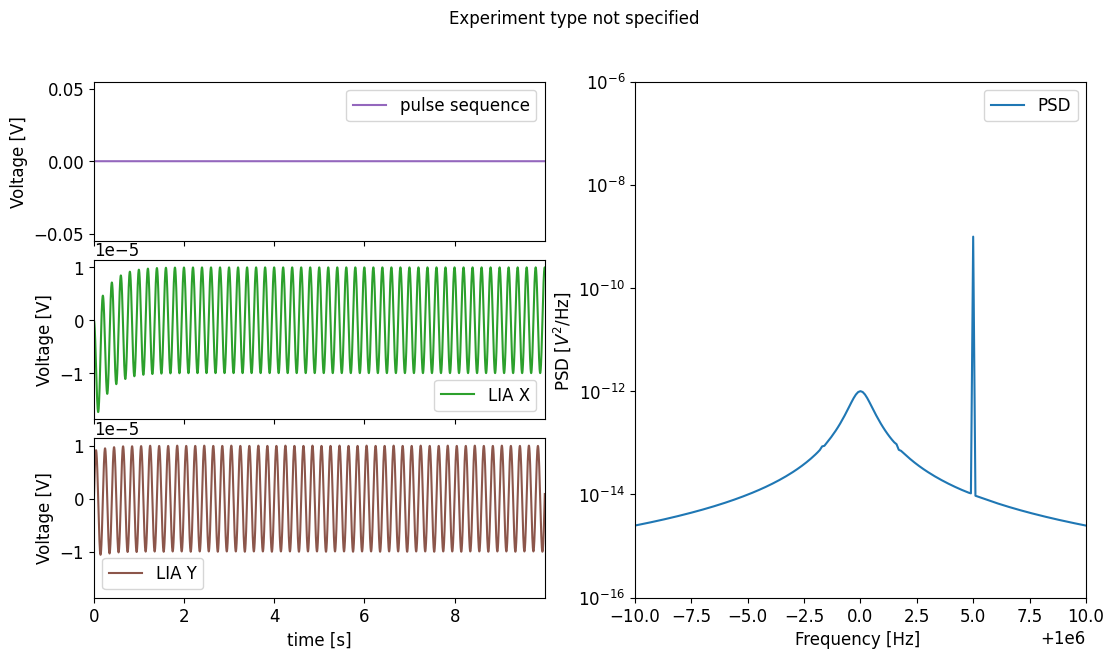

In [20]:
specxaxis, spectrum, specxunit, specyunit = simu.liastream.GetSpectrum(
    showtimedomain=True,
    showfit=False,
    showlegend=True,  # !!!!!show or not to show legend
    spectype="PSD",  # in 'PSD', 'ASD', 'FLuxPSD', 'FluxASD'
    ampunit="V",
    specxunit="Hz",  # 'Hz' 'kHz' 'MHz' 'GHz' 'ppm' 'ppb'
    specxlim=[simu.demodfreq -10, simu.demodfreq + 10],
    specylim=[1e-16, 1.e-6],
    specyscale='log',
    return_opt=True
)

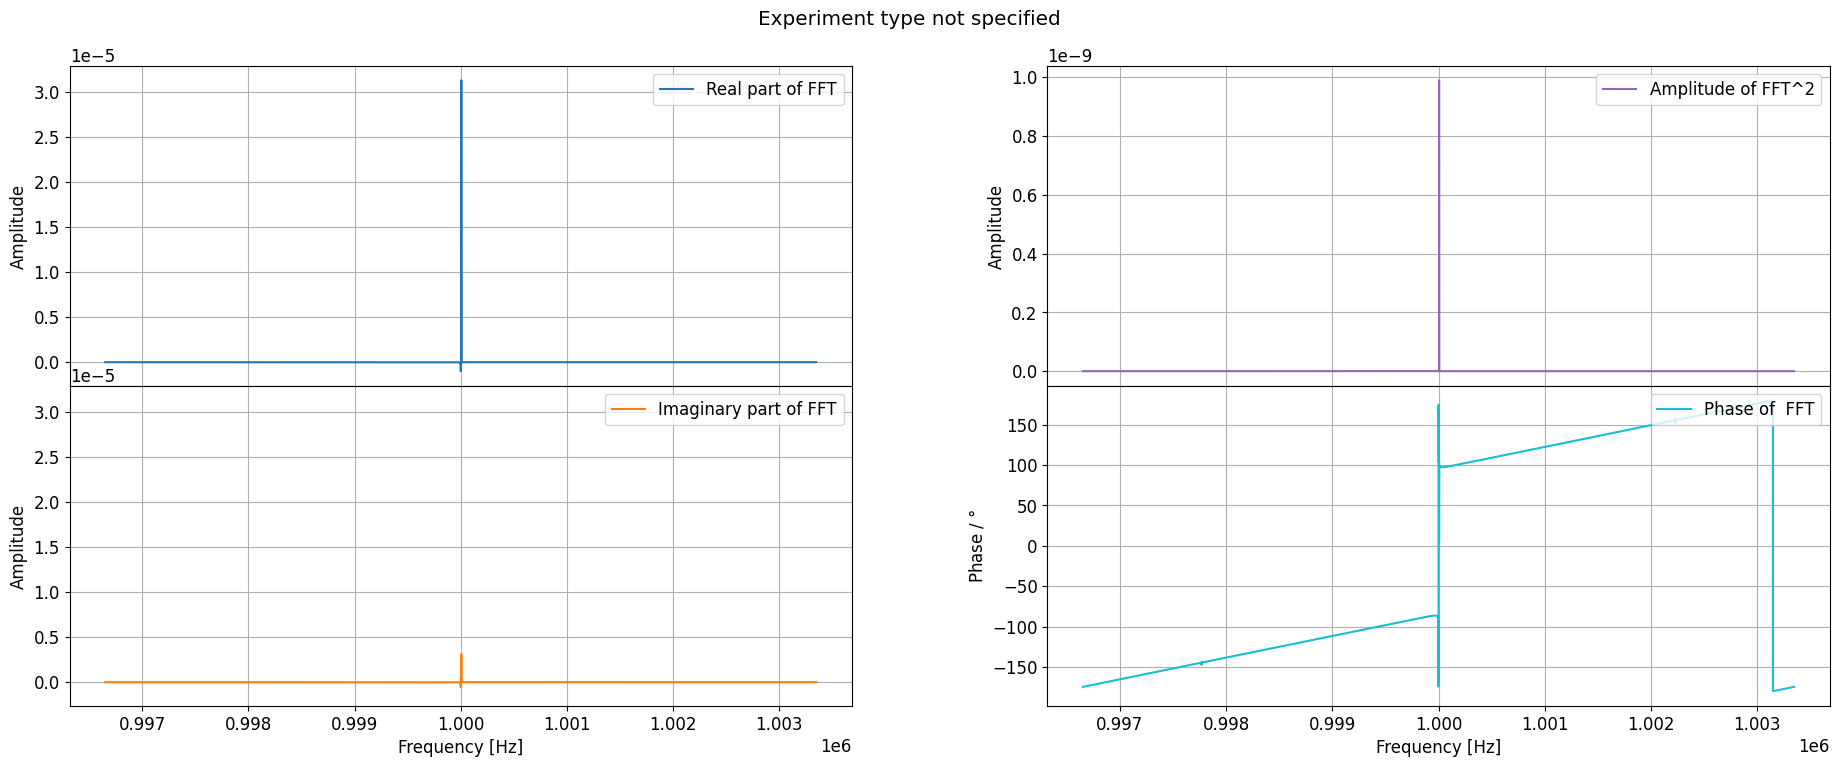

In [10]:
simu.liastream.GetNoPulseFFT()
simu.liastream.plotFFT()